In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/E_feature_selection/feature_selection-2023.csv', sep=";")


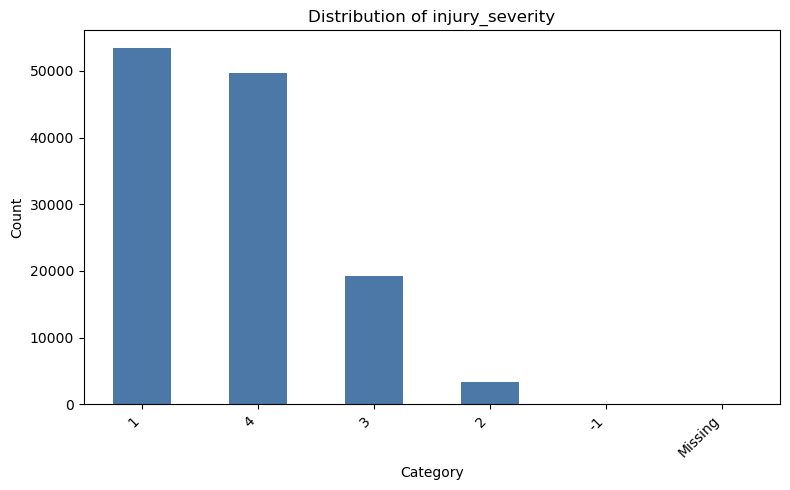

In [7]:
# Find relevant columns (robust to the common typo)
severity_cols = [c for c in df.columns if ("injury_severity" in c)]

plt.figure(figsize=(8, 5))

if len(severity_cols) == 1:
    # Single categorical column: plot category counts (including NaN as 'Missing')
    col = severity_cols[0]
    counts = df[col].astype("category")
    counts = counts.cat.add_categories(["Missing"]).fillna("Missing").value_counts(dropna=False)
    counts.plot(kind="bar", color="#4C78A8")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Category")
    plt.ylabel("Count")
else:
    # Multiple indicator columns: sum per column and plot
    subset = df[severity_cols].copy()

    # Convert booleans to int; coerce others to numeric, treat non-numeric as 0
    for c in subset.columns:
        if subset[c].dtype == bool:
            subset[c] = subset[c].astype(int)
        else:
            subset[c] = pd.to_numeric(subset[c], errors="coerce")
    counts = subset.fillna(0).sum(axis=0)

    counts.sort_values(ascending=False).plot(kind="bar", color="#4C78A8")
    plt.title("Counts by injury severity columns")
    plt.xlabel("Column")
    plt.ylabel("Sum")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()